<a href="https://colab.research.google.com/github/GORLASANDEEP2002/OIBSIP-DataScience/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pickle

In [ ]:
df = pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.shape

(301, 9)

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.duplicated().sum()

2

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<Axes: >

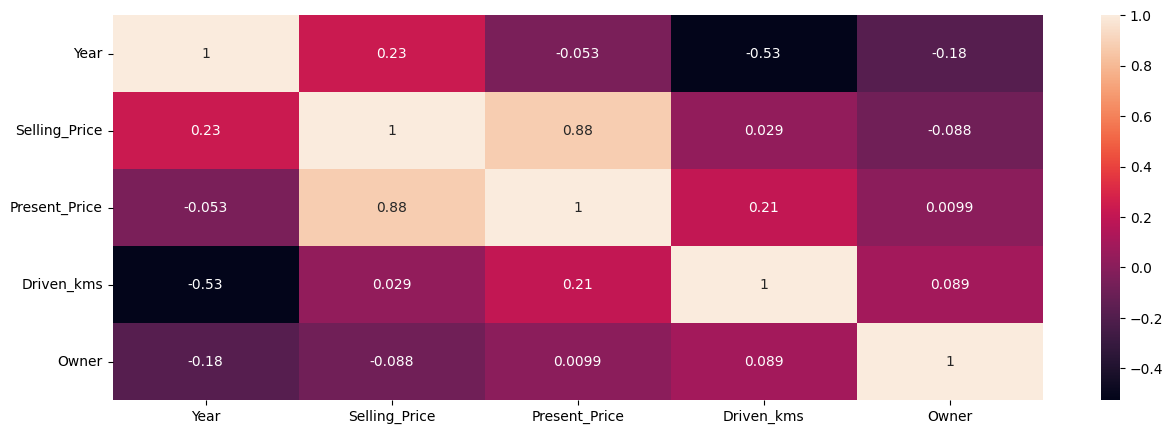

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# plot heatmap
sns.heatmap(df[numerical_cols].corr(), annot=True)

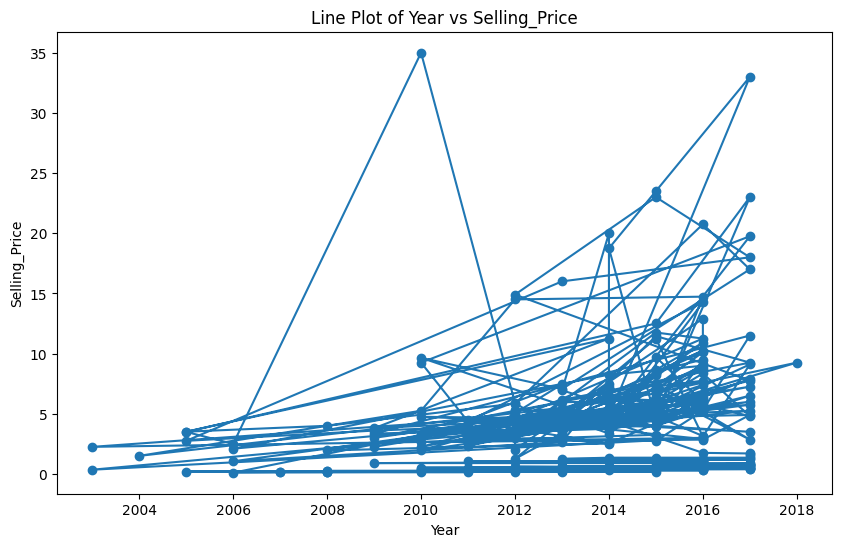

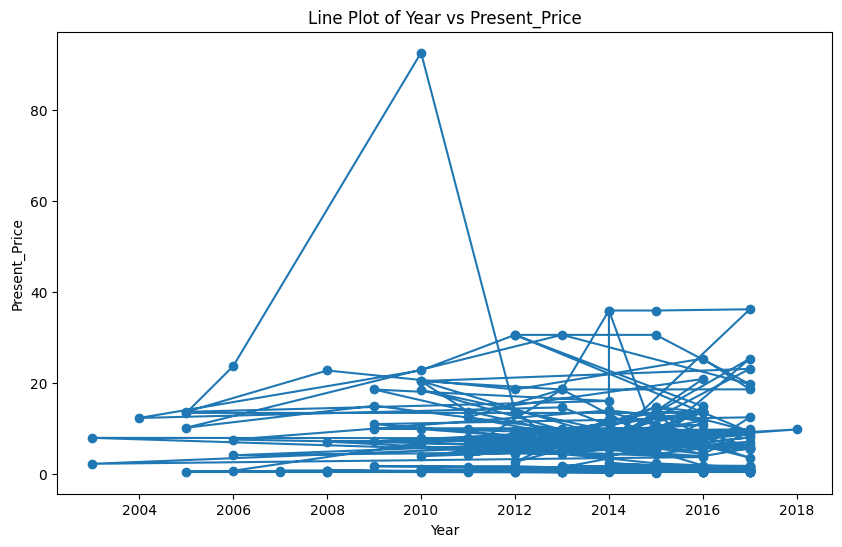

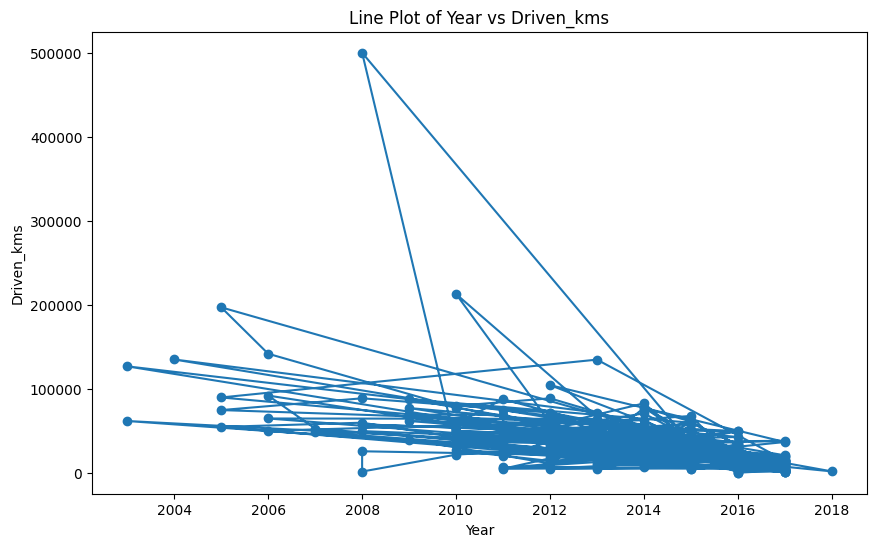

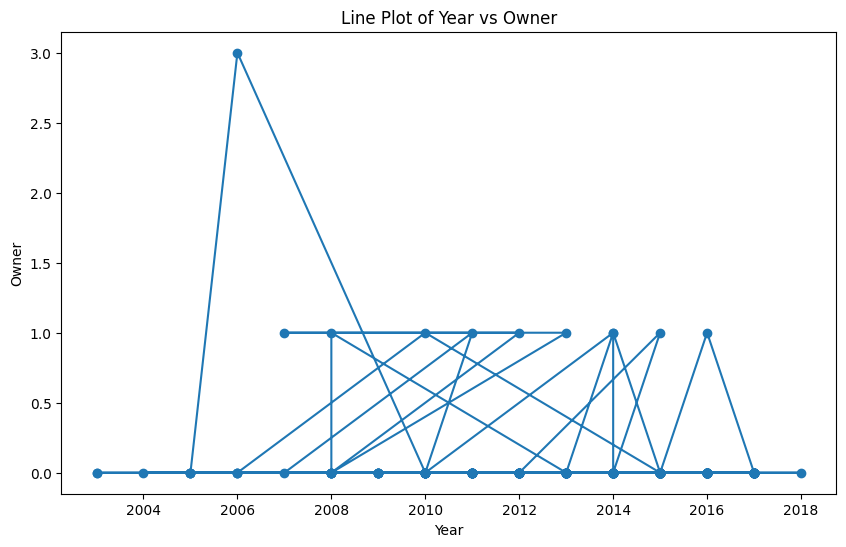

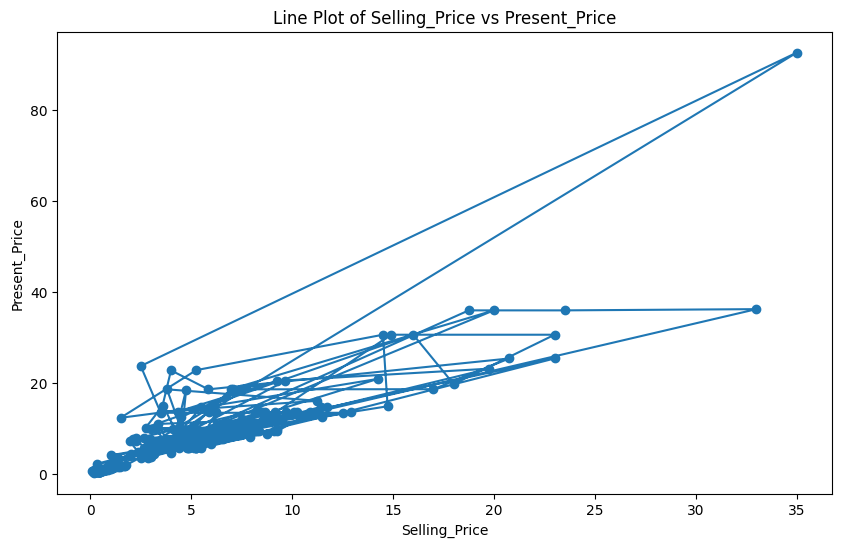

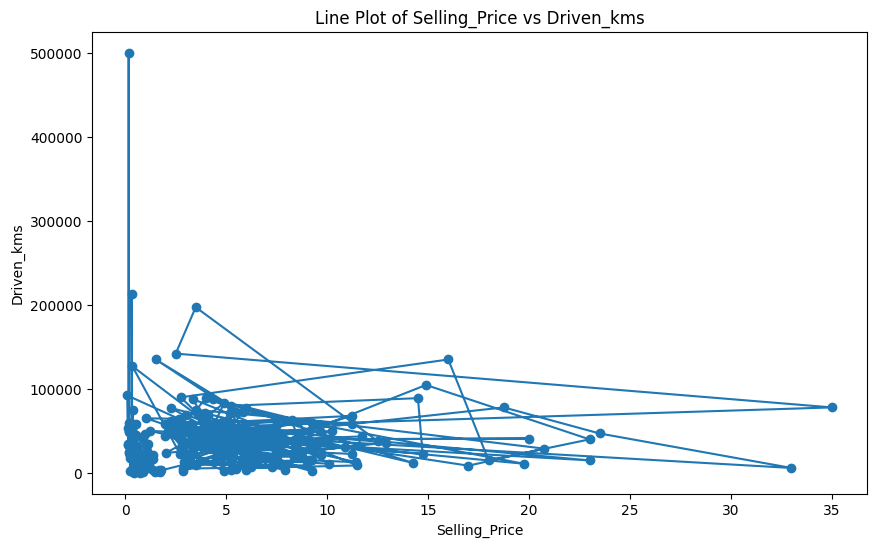

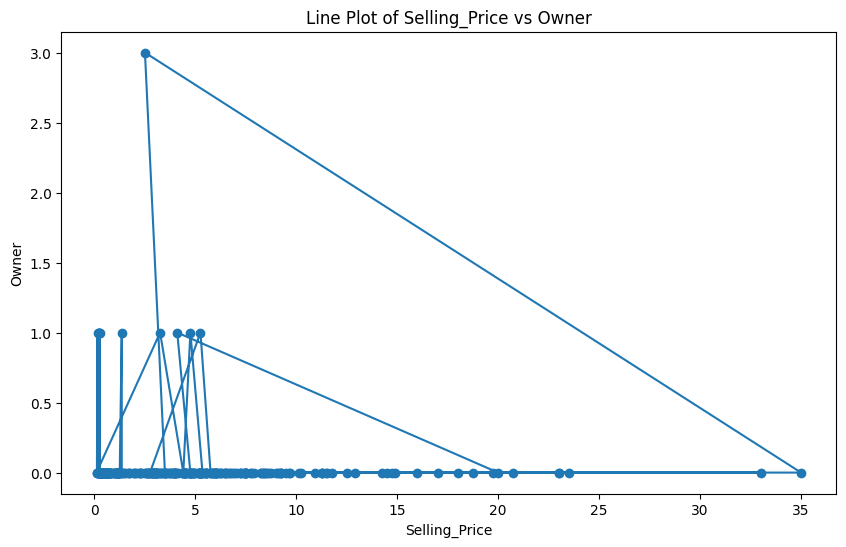

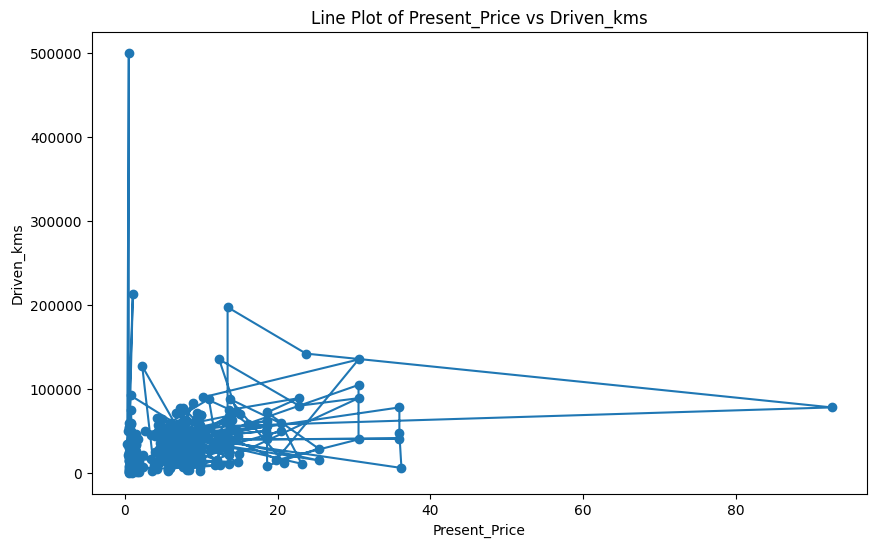

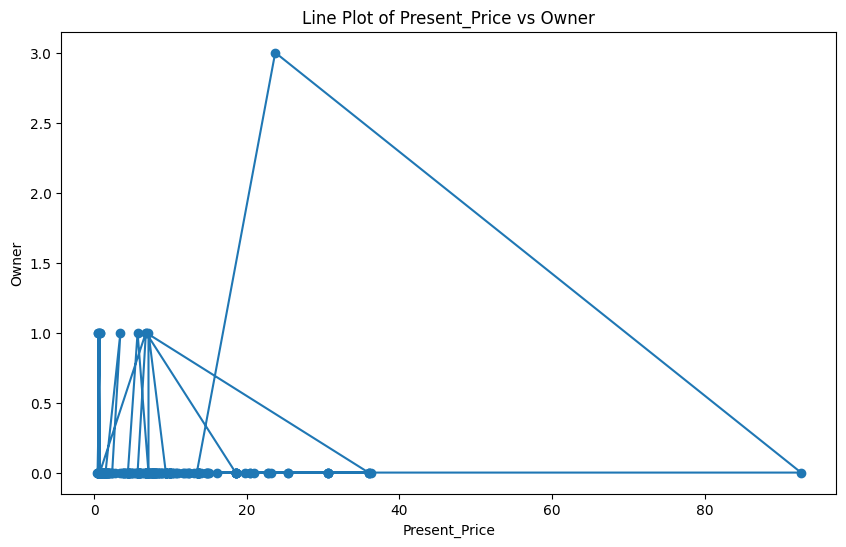

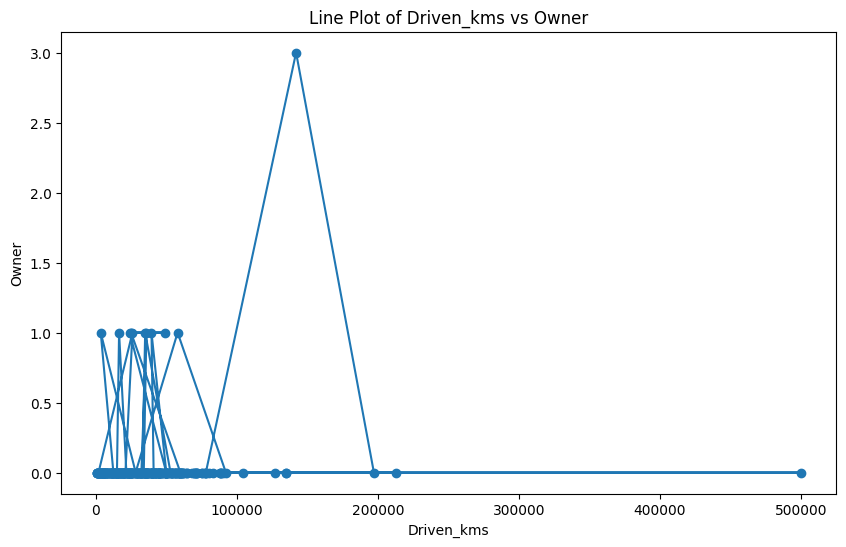

In [ ]:
for i, col_x in enumerate(numerical_cols):
    for col_y in numerical_cols[i+1:]:
        plt.figure(figsize=(10, 6))
        plt.plot(df[col_x], df[col_y], marker='o')
        plt.xlabel(col_x)
        plt.ylabel(col_y)
        plt.title(f'Line Plot of {col_x} vs {col_y}')
        plt.show()

In [ ]:

for i, col_x in enumerate(numerical_cols):
    for col_y in numerical_cols[i+1:]:
        fig = px.scatter(df, x=col_x, y=col_y, title=f'Scatter Plot of {col_x} vs {col_y}')
        fig.show()

In [ ]:
# extract categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
# box plot of categorical columns vs numerical columns
for col_x in categorical_cols:
    for col_y in numerical_cols:
        fig = px.box(df, x=col_x, y=col_y, title=f'Box Plot of {col_x} vs {col_y}')
        fig.show()

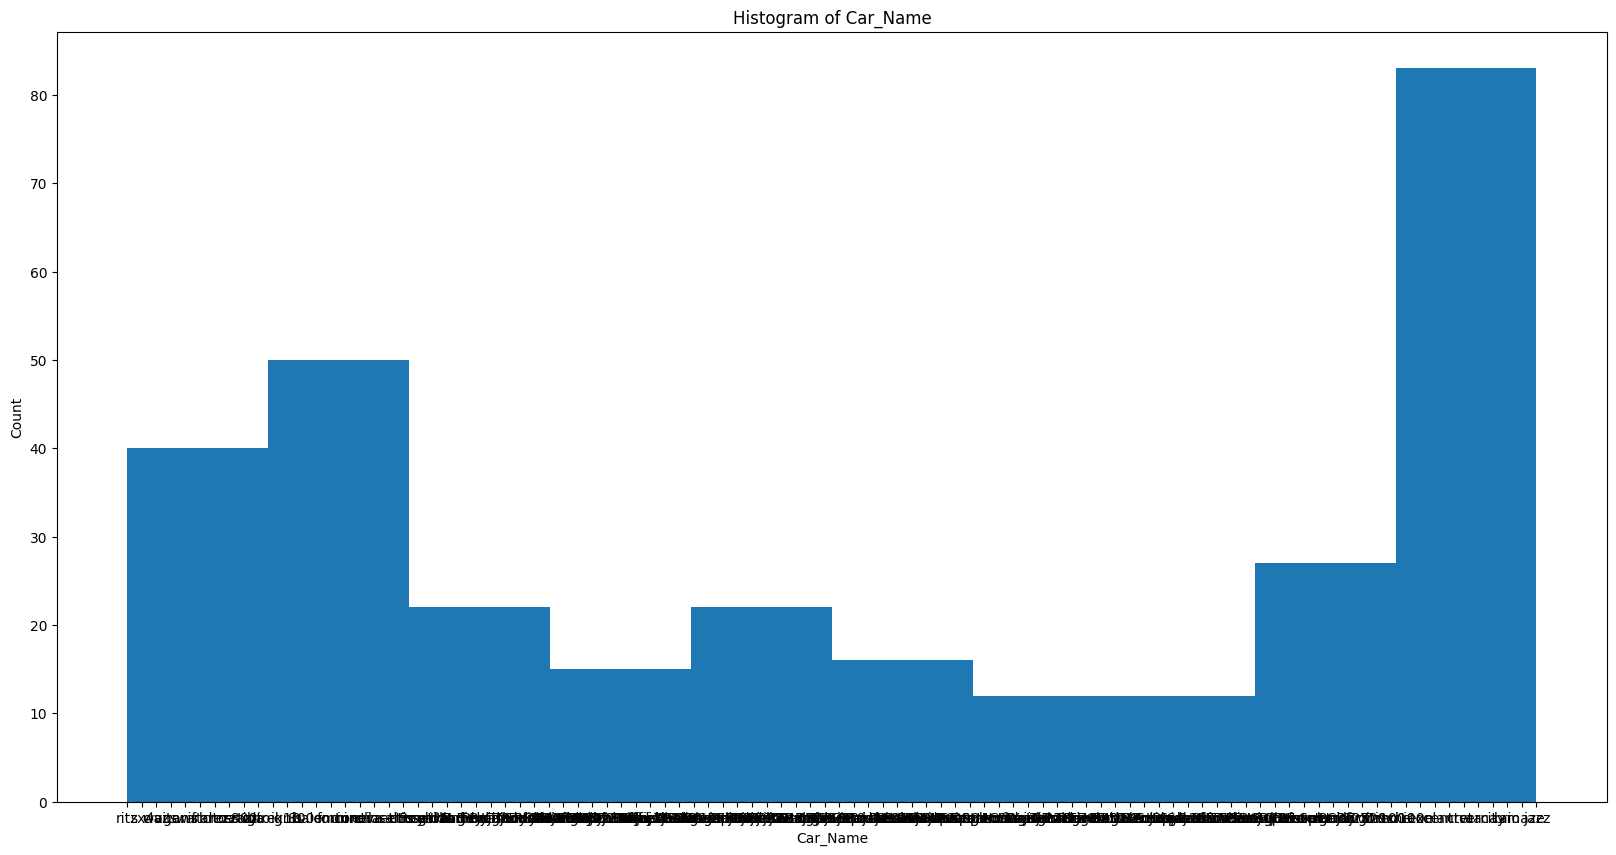

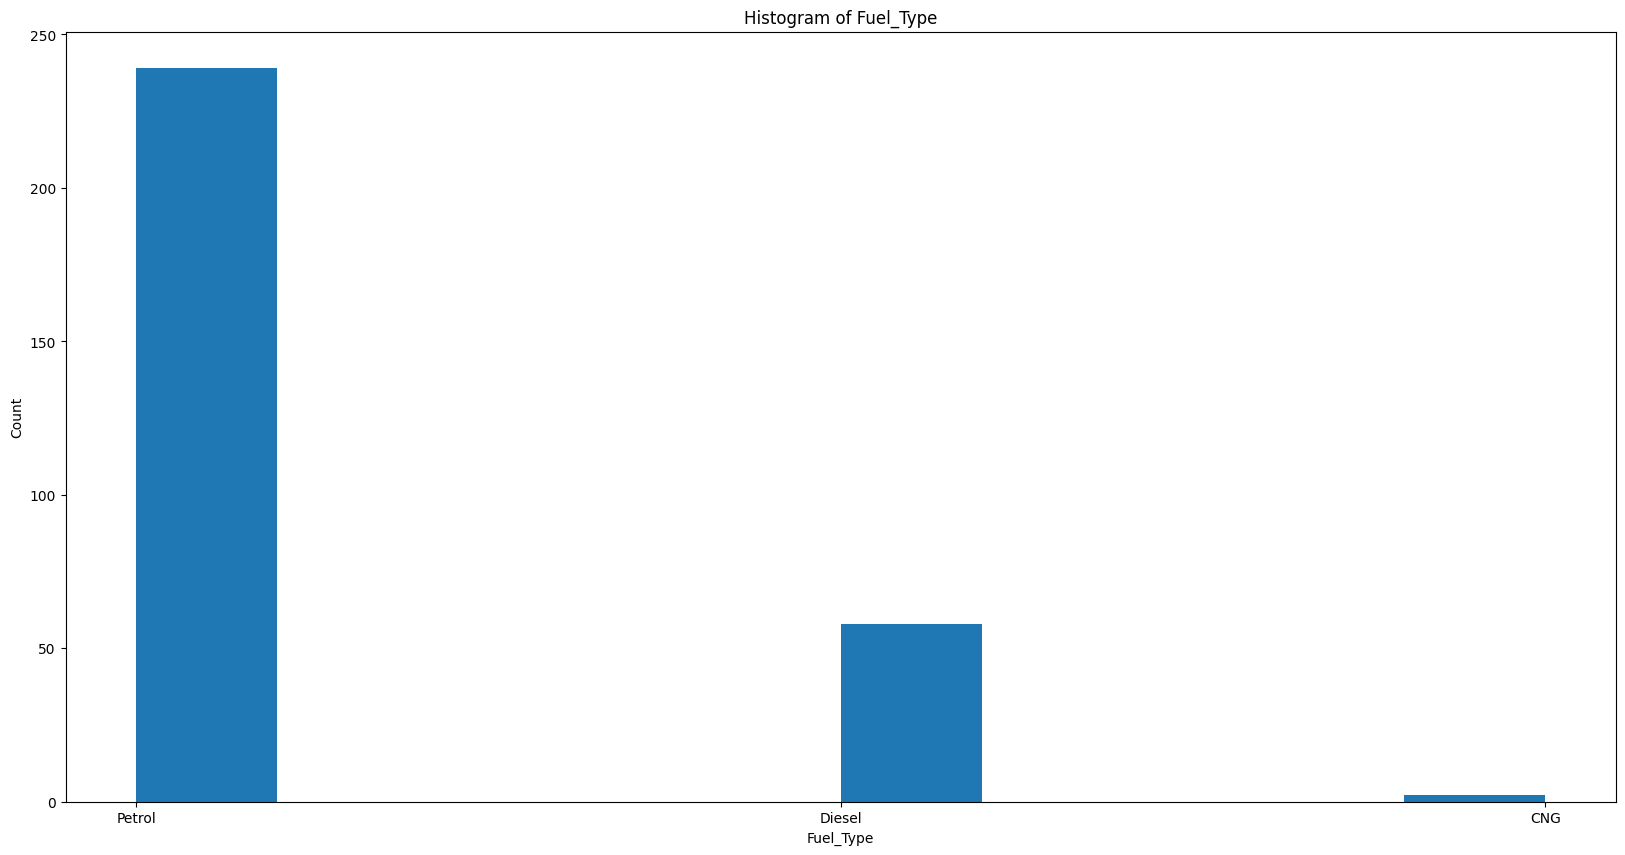

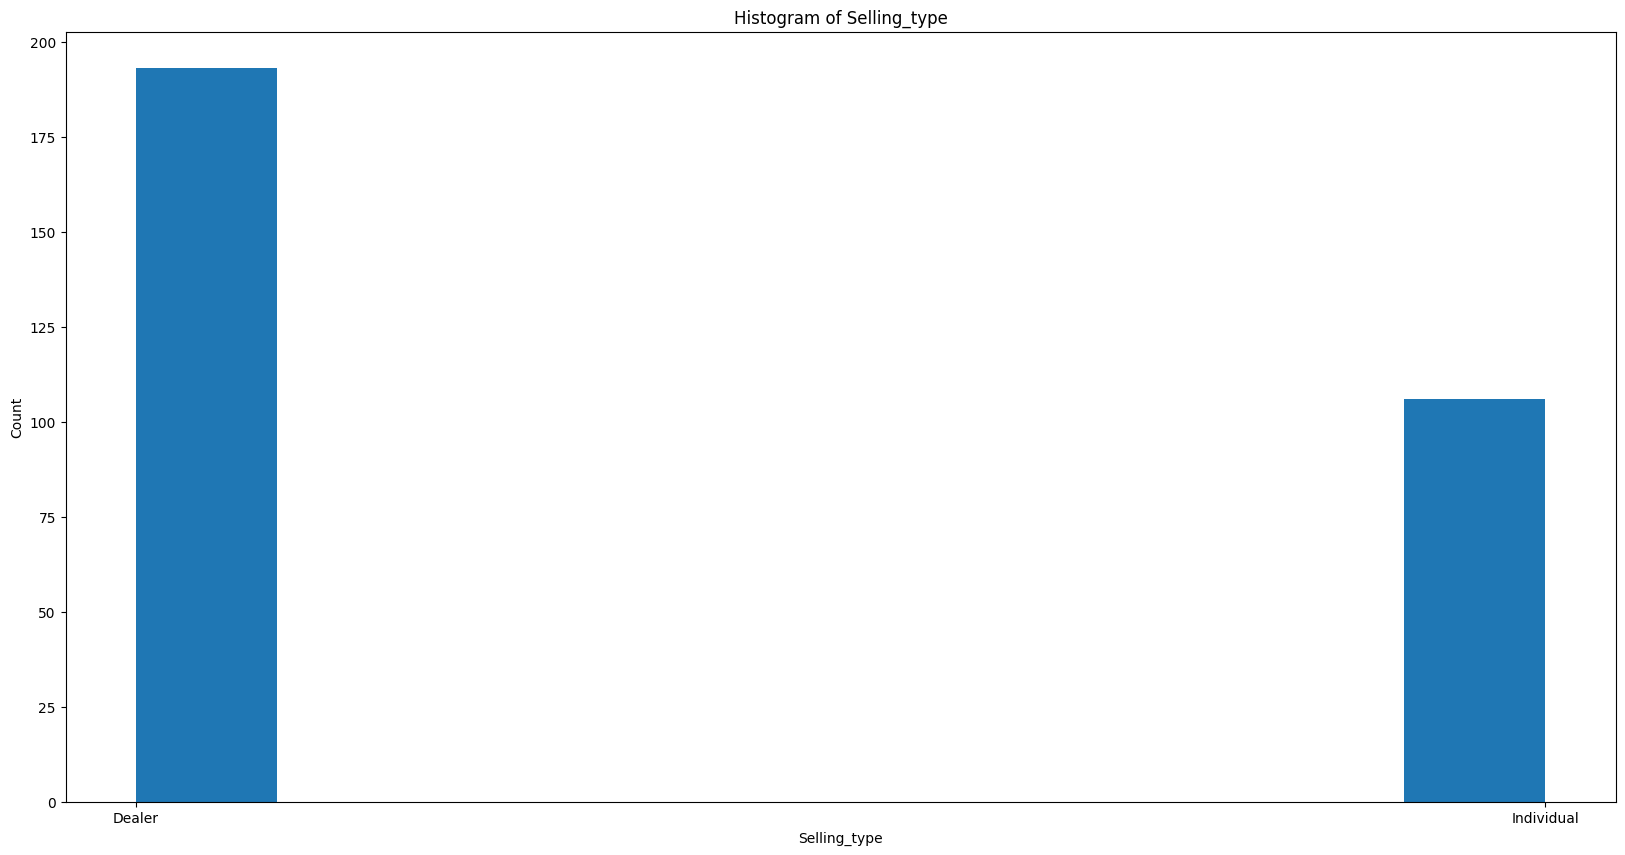

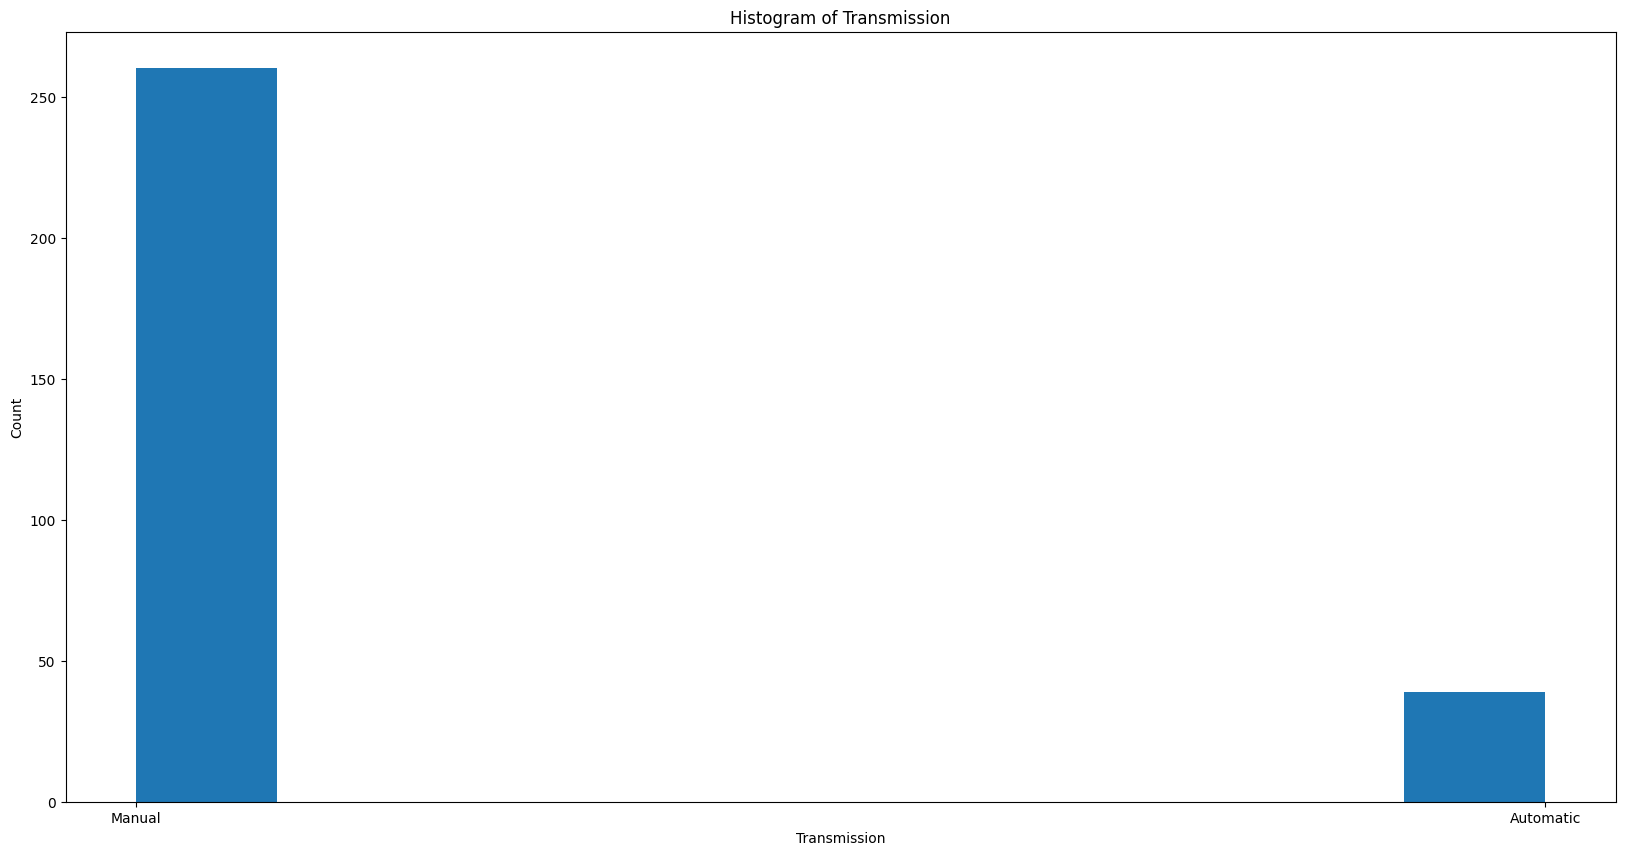

In [ ]:
# plot histogram of each categorical column using matplotlib
for col in categorical_cols:
    plt.figure(figsize=(20, 10))
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Histogram of {col}')
    plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [ ]:
le = LabelEncoder()
df['Car_Name'] = le.fit_transform(df['Car_Name'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix["Selling_Price"].sort_values(ascending=False)
print("Correlation with target:\n", correlation_with_target)

Correlation with target:
 Selling_Price    1.000000
Present_Price    0.876305
Car_Name         0.501429
Year             0.234369
Driven_kms       0.028566
Owner           -0.087880
Transmission    -0.348869
Fuel_Type       -0.500292
Selling_type    -0.553851
Name: Selling_Price, dtype: float64


In [ ]:
threshold = 0.5
selected_features = correlation_with_target[abs(correlation_with_target) > threshold].index
print("Selected features:\n", selected_features)

Selected features:
 Index(['Selling_Price', 'Present_Price', 'Car_Name', 'Fuel_Type',
       'Selling_type'],
      dtype='object')


In [ ]:
X = df[selected_features].drop('Selling_Price', axis=1)
y = df['Selling_Price']

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.22813821,  1.07634401,  0.49184668, -0.74109567],
       [ 0.23374233,  1.1936136 , -1.88012358, -0.74109567],
       [ 0.26999119,  0.21636698,  0.49184668, -0.74109567],
       ...,
       [ 0.40446274,  0.25545684,  0.49184668, -0.74109567],
       [ 0.57986041,  0.25545684, -1.88012358, -0.74109567],
       [-0.19188936,  0.13818725,  0.49184668, -0.74109567]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('Support Vector Machine', SVR()),
    ('Linear Regression', LinearRegression()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Ada Boost', AdaBoostRegressor(random_state=42))
]

# Initialize variables to track the best model and its metrics
best_model = None
best_mse = np.inf  # Initialize with infinity
best_r2 = -np.inf  # Initialize with negative infinity

# Initialize lists to store the results
model_names = []
mse_scores = []
r2_scores = []
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # Perform cross-validation
    mse = -cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    r2 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2').mean()

    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Mean Squared Error:", mse)
    print("Cross-validation R-squared:", r2)
    print()
    # The following three lines were indented too far, causing the error
    model_names.append(name)
    mse_scores.append(mse)
    r2_scores.append(r2)

    # Check if the current model has the best MSE
    if mse < best_mse:
        best_mse = mse
        best_model = pipeline

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Mean Squared Error': mse_scores,
    'R-squared': r2_scores
})
best_model_name = results_df.loc[results_df['Mean Squared Error'].idxmin(), 'Model']
best_model_row = results_df.loc[results_df['Model'] == best_model_name]

# Print the best model and its metrics
print("\nBest Model (Based on Mean Squared Error):")
print(best_model_row)
print()

Model: Random Forest
Cross-validation Mean Squared Error: 4.537182843907494
Cross-validation R-squared: 0.8013117821077206

Model: Gradient Boosting
Cross-validation Mean Squared Error: 4.647906291221718
Cross-validation R-squared: 0.8020143267079215

Model: Support Vector Machine
Cross-validation Mean Squared Error: 10.059363255275375
Cross-validation R-squared: 0.6317239836360529

Model: Linear Regression
Cross-validation Mean Squared Error: 5.319875326863251
Cross-validation R-squared: 0.7856665238373381

Model: K-Nearest Neighbors
Cross-validation Mean Squared Error: 4.86290469574468
Cross-validation R-squared: 0.7938359407063933

Model: Decision Tree
Cross-validation Mean Squared Error: 6.02268770505661
Cross-validation R-squared: 0.7280723704894922

Model: Ada Boost
Cross-validation Mean Squared Error: 4.7432232078162
Cross-validation R-squared: 0.7975062536317571


Best Model (Based on Mean Squared Error):
           Model  Mean Squared Error  R-squared
0  Random Forest         

In [ ]:
print("Results:")
print(results_df)

Results:
                    Model  Mean Squared Error  R-squared
0           Random Forest            4.537183   0.801312
1       Gradient Boosting            4.647906   0.802014
2  Support Vector Machine           10.059363   0.631724
3       Linear Regression            5.319875   0.785667
4     K-Nearest Neighbors            4.862905   0.793836
5           Decision Tree            6.022688   0.728072
6               Ada Boost            4.743223   0.797506


In [ ]:

pickle.dump(best_model, open('car_price_prediction.pkl', 'wb'))
